## Best Fit Line Implementation

In [19]:
import pandas as pd
import tabula
import numpy as np
import matplotlib.pyplot as plt

**Note: Tabula** uses Java internally, so ensure that your system has Java installed

In [2]:
df, = tabula.read_pdf('./dataset/lit_rate.pdf', pages='all')
df

,States/Union Territories,1951,1961,1971,1981,1991,2001,2011
0,Andaman and Nicobar Islands,30.30,40.07,51.15,63.19,73.02,81.30,86.63
1,Andhra Pradesh,-,21.19,24.57,35.66,44.08,60.47,67.02
2,Arunachal Pradesh,-,7.13,11.29,25.55,41.59,54.34,65.39
3,Assam,18.53,32.95,33.94,-,52.89,63.25,72.19
4,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
5,Chandigarh,-,-,70.43,74.80,77.81,81.94,86.05
6,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
7,Dadra and Nagar Haveli,-,-,18.13,32.90,40.71,57.63,76.24
8,Daman and Diu,-,-,-,-,71.20,78.18,87.10
9,Delhi,-,61.95,65.08,71.94,75.29,81.67,86.21


In [3]:
df.to_pickle('literacy_rate.pickle') # save 

In [4]:
df.dtypes

States/Union Territories     object
1951                         object
1961                         object
1971                         object
1981                         object
1991                         object
2001                        float64
2011                        float64
dtype: object

In [5]:
df.replace({'-': '0'}, inplace=True) ## Relacing missing value with 0

In [6]:
df

,States/Union Territories,1951,1961,1971,1981,1991,2001,2011
0,Andaman and Nicobar Islands,30.30,40.07,51.15,63.19,73.02,81.30,86.63
1,Andhra Pradesh,0,21.19,24.57,35.66,44.08,60.47,67.02
2,Arunachal Pradesh,0,7.13,11.29,25.55,41.59,54.34,65.39
3,Assam,18.53,32.95,33.94,0,52.89,63.25,72.19
4,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
5,Chandigarh,0,0,70.43,74.80,77.81,81.94,86.05
6,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
7,Dadra and Nagar Haveli,0,0,18.13,32.90,40.71,57.63,76.24
8,Daman and Diu,0,0,0,0,71.20,78.18,87.10
9,Delhi,0,61.95,65.08,71.94,75.29,81.67,86.21


In [7]:
all_headers = df.columns
all_headers

Index(['States/Union Territories', '1951', '1961', '1971', '1981', '1991',
       '2001', '2011'],
      dtype='object')

In [8]:
all_headers[1:]

Index(['1951', '1961', '1971', '1981', '1991', '2001', '2011'], dtype='object')

In [9]:
df[all_headers[1:]] = df[all_headers[1:]].apply(pd.to_numeric)

In [10]:
df.dtypes

States/Union Territories     object
1951                        float64
1961                        float64
1971                        float64
1981                        float64
1991                        float64
2001                        float64
2011                        float64
dtype: object

### Algorithm  
A line of best fit is a straight line that is the best approximation of the given set of data.
A more accurate way of finding the line of best fit is the **least square method**

Use the following steps to find the equation of line of best fit for a set of ordered pairs (x1,y1),(x2,y2),...(xn,yn)

- Step 1: Calculate the mean of the x values and the mean of the y values.

<img src="https://latex.codecogs.com/gif.latex?\bar{X}&space;=&space;\frac{\sum_{i=1}^{n}x_$$i}{n}"/> 

<img src="https://latex.codecogs.com/gif.latex?\bar{Y}&space;=&space;\frac{\sum_{i=1}^{n}y_$$i}{n}"/>


- Step 2: The following formula gives the slope of the line of best fit:

<img src="https://latex.codecogs.com/gif.latex?m&space;=&space;\frac{\sum_{i=1}^{n}(x_$$i&space;-&space;\bar{X})(y_$$i&space;-&space;\bar{Y})}{\sum_{i=1}^{n}(x_$$i&space;-&space;\bar{X})}"/>

- Step 3: Compute the y intercept of the line by using the formula:

<img src="https://latex.codecogs.com/gif.latex?b&space;=&space;\bar{Y}&space;-&space;m\bar{X}"/>

- Step 4: Use the slope m and the y -intercept b to form the equation of the line. 

In [11]:
def best_fit(X, Y, verbose=False):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) 

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    if verbose:
        print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


def plot_best_fit(x, y, a, b, title):
    plt.scatter(x, y, marker='x', c='r')
    yfit = [a + b * xi for xi in x]
    plt.plot(x, yfit)
    plt.xlabel('Years')
    plt.ylabel('Literacy Rate %')
    plt.title(title)

In [12]:
n_states, _ = df.shape
n_states

best_fit_weight = []

### Calculating for all the states

In [13]:
x = np.array([1951, 1961, 1971, 1981, 1991, 2001, 2011])
for i in range(n_states):
    y = df.iloc[i, 1:].to_numpy()
    non_zero_idx = np.nonzero(y)
    
    a,b = best_fit(x[non_zero_idx], y[non_zero_idx])
    best_fit_weight.append([df.iloc[i, 0], a, b])

best_fit_weight = pd.DataFrame(data=best_fit_weight)

In [14]:
best_fit_weight

,0,1,2
0,Andaman and Nicobar Islands,-1872.930429,0.976143
1,Andhra Pradesh,-1916.995629,0.986486
2,Arunachal Pradesh,-2442.553971,1.247114
3,Assam,-1656.124750,0.859036
4,Bihar,-1447.262679,0.747679
5,Chandigarh,-685.939800,0.383800
6,Chhattisgarh,-2046.001714,1.051714
7,Dadra and Nagar Haveli,-2761.192500,1.409500
8,Daman and Diu,-1511.968333,0.795000
9,Delhi,-916.018914,0.498343


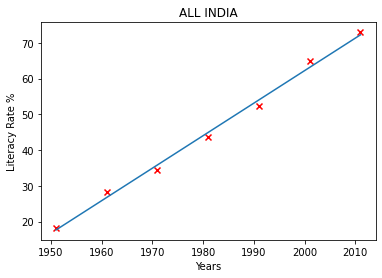

In [15]:
title, a, b = best_fit_weight.iloc[-1, :]
y = df.iloc[-1, 1:].to_numpy()
non_zero_idx = np.nonzero(y)
plot_best_fit(x[non_zero_idx], y[non_zero_idx], a, b, title)

Changing the names of the state to avoid errors

In [16]:
best_fit_weight.columns = ['State', 'a', 'b']
for i in range(len(best_fit_weight)):
    if best_fit_weight.loc[i, 'State'] == 'Andaman and Nicobar Islands':
        best_fit_weight.loc[i, 'State'] = 'a&n islands'
    elif best_fit_weight.loc[i, 'State'] == 'Dadra and Nagar Haveli':
        best_fit_weight.loc[i, 'State'] = 'd&n haveli'
    elif best_fit_weight.loc[i, 'State'] == 'Jammu and Kashmir':
        best_fit_weight.loc[i, 'State'] = 'jammu & kashmir'
    elif best_fit_weight.loc[i, 'State'] == 'Daman and Diu':
        best_fit_weight.loc[i, 'State'] = 'daman & diu'
    else:
        best_fit_weight.loc[i, 'State'] = best_fit_weight.loc[i, 'State'].lower()
        
best_fit_weight.head(5)

,State,a,b
0,a&n islands,-1872.930429,0.976143
1,andhra pradesh,-1916.995629,0.986486
2,arunachal pradesh,-2442.553971,1.247114
3,assam,-1656.124750,0.859036
4,bihar,-1447.262679,0.747679


In [17]:
best_fit_weight.to_pickle('best_fit_weights.pickle')

Preparing clubbed dataset containing the dataset

In [18]:
dataset = pd.read_csv('./india-basemap/data_clubbed.csv', header=None)
values = []
values.append(13)
for i in range(1, len(dataset)):
    if dataset.loc[i, 0] != 'telangana':
        a = best_fit_weight.loc[best_fit_weight['State'] == dataset.loc[i, 0]]
    else:
        a = best_fit_weight.loc[best_fit_weight['State'] == 'all india']
    b = a.values.tolist()
    val = b[0][2] * dataset.loc[i, 1] + b[0][1]   
    values.append(val)

dataset['Literacy Rate'] = values
dataset.head()
dataset.to_csv('data_combined.csv')